In [2]:
import warnings
# Filter out the specific warning message
warnings.filterwarnings("ignore", message="A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.")
import MLMarker_app
import pandas as pd
import numpy as np
from MLMarker_app import MLMarker
import matplotlib.pyplot as plt
import random

/home/compomics/miniconda3/envs/mlmarker/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [30]:
import pandas as pd
metadata = {
    'S:\\Proteomics\\CMB\\CMB-1515\\T063417_AurEl7_PM7_CMB-1515_9_GD6_1_10072.d': 'VSMC',
    'S:\\Proteomics\\CMB\\CMB-1515\\T063423_AurEl7_PM7_CMB-1515_6_GD3_1_10078.d': 'occlusie',
    'S:\\Proteomics\\CMB\\CMB-1515\\T063425_AurEl7_PM7_CMB-1515_5_GD2_1_10080.d': 'occlusie',
    'S:\\Proteomics\\CMB\\CMB-1515\\T063427_AurEl7_PM7_CMB-1515_4_GD1_1_10082.d': 'VSMC',
    'S:\\Proteomics\\CMB\\CMB-1515\\T063429_AurEl7_PM7_CMB-1515_3_GC8_1_10084.d': 'occlusie',
    'S:\\Proteomics\\CMB\\CMB-1515\\T063431_AurEl7_PM7_CMB-1515_2_GC7_1_10086.d': 'VSMC'
}

metadata = pd.DataFrame.from_dict(metadata, orient='index', columns=['Type'])
metadata.index.name = 'Sample'
metadata.reset_index(inplace=True)
metadata


,Sample,Type
0,S:\Proteomics\CMB\CMB-1515\T063417_AurEl7_PM7_...,VSMC
1,S:\Proteomics\CMB\CMB-1515\T063423_AurEl7_PM7_...,occlusie
2,S:\Proteomics\CMB\CMB-1515\T063425_AurEl7_PM7_...,occlusie
3,S:\Proteomics\CMB\CMB-1515\T063427_AurEl7_PM7_...,VSMC
4,S:\Proteomics\CMB\CMB-1515\T063429_AurEl7_PM7_...,occlusie
5,S:\Proteomics\CMB\CMB-1515\T063431_AurEl7_PM7_...,VSMC


The base value is 0.04166666666666658
Esophagus


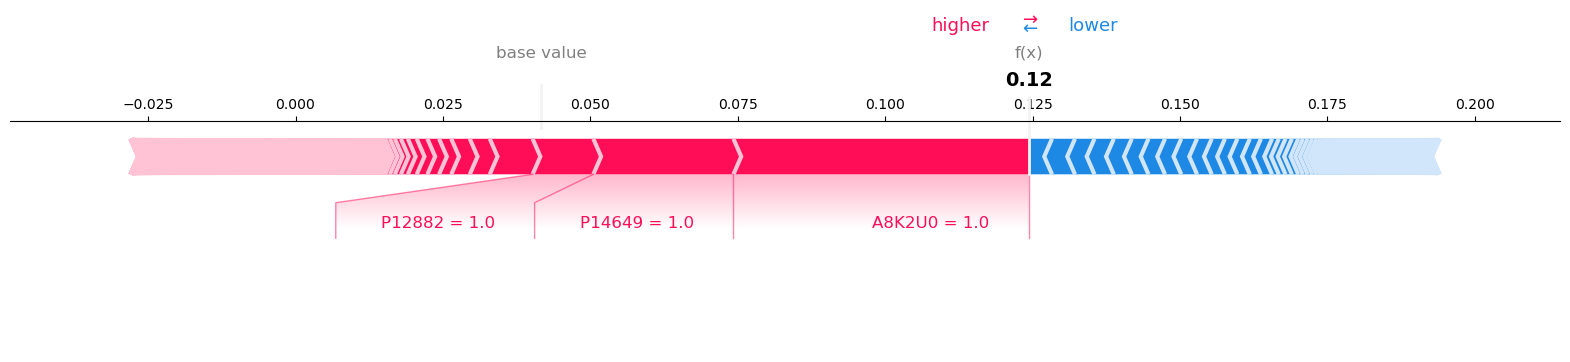

None

Prostate


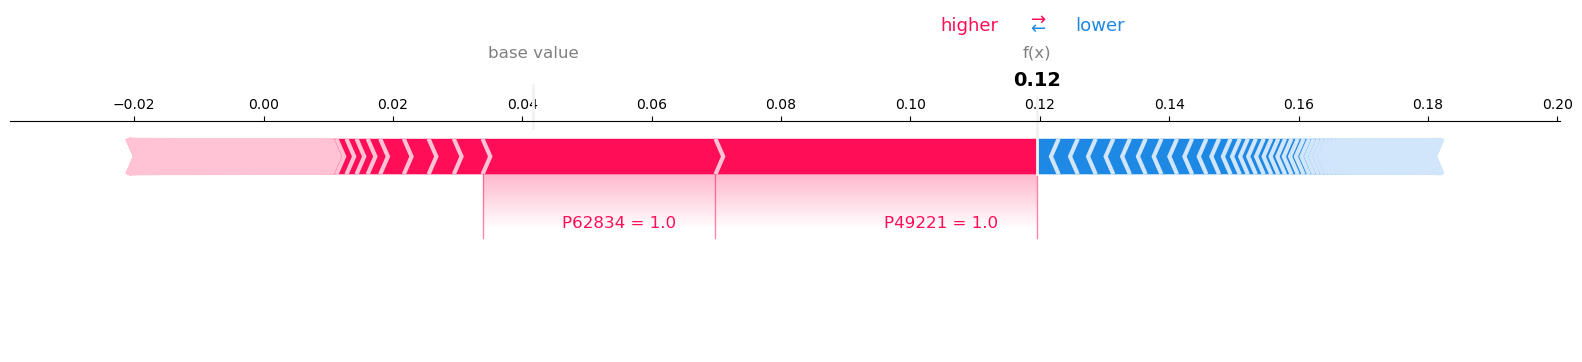

None

Testis


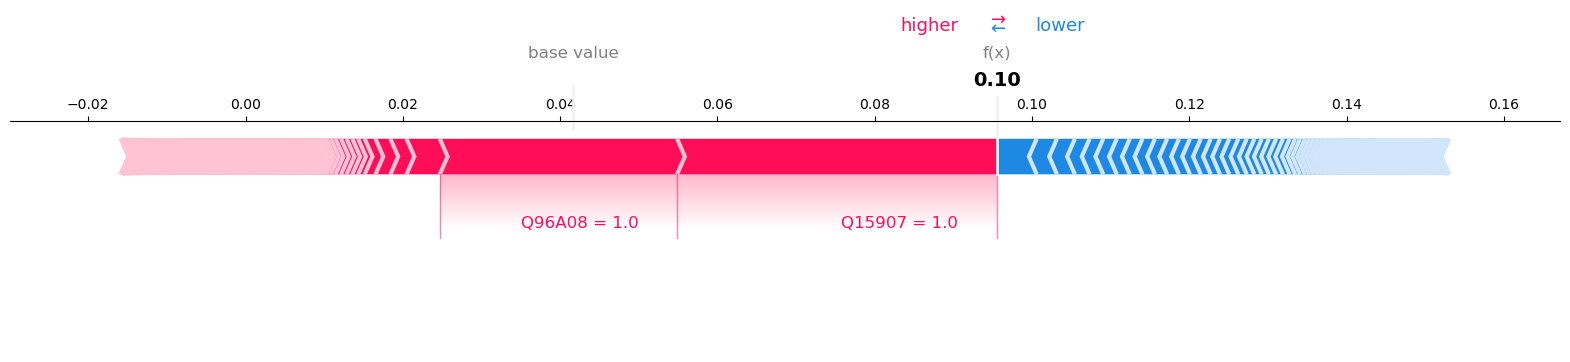

None

Ureter


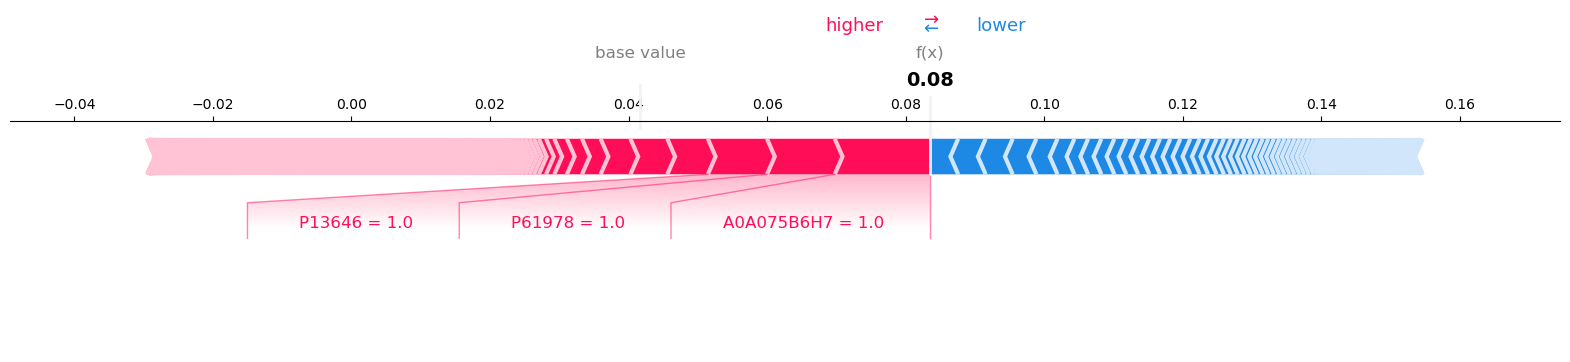

None

Adipose tissue


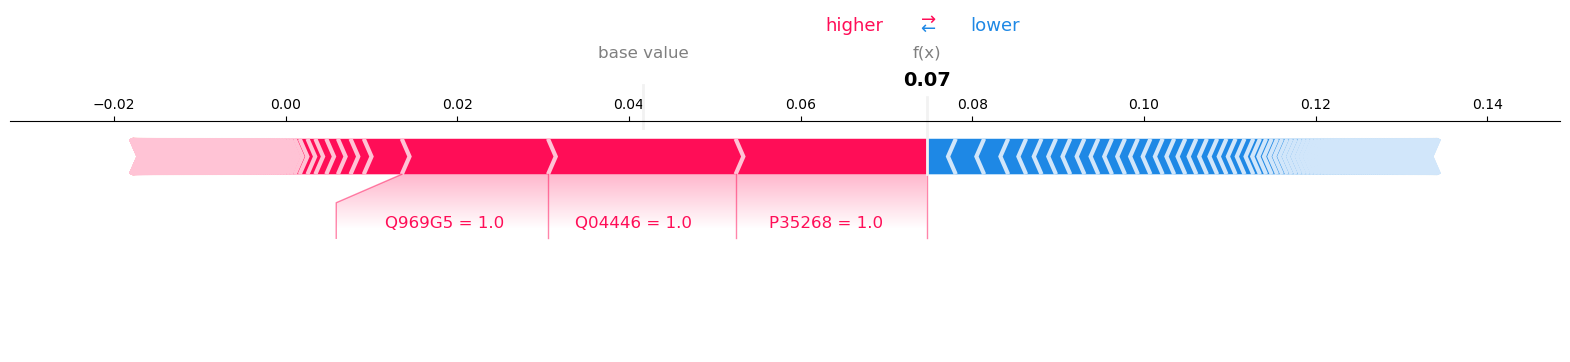

None

S:\Proteomics\CMB\CMB-1515\T063417_AurEl7_PM7_CMB-1515_9_GD6_1_10072.d
tissue
Prostate          0.078669
Esophagus         0.077478
Testis            0.057483
Adipose tissue    0.039942
Ureter            0.025773
dtype: float64


The base value is 0.04166666666666658
Esophagus


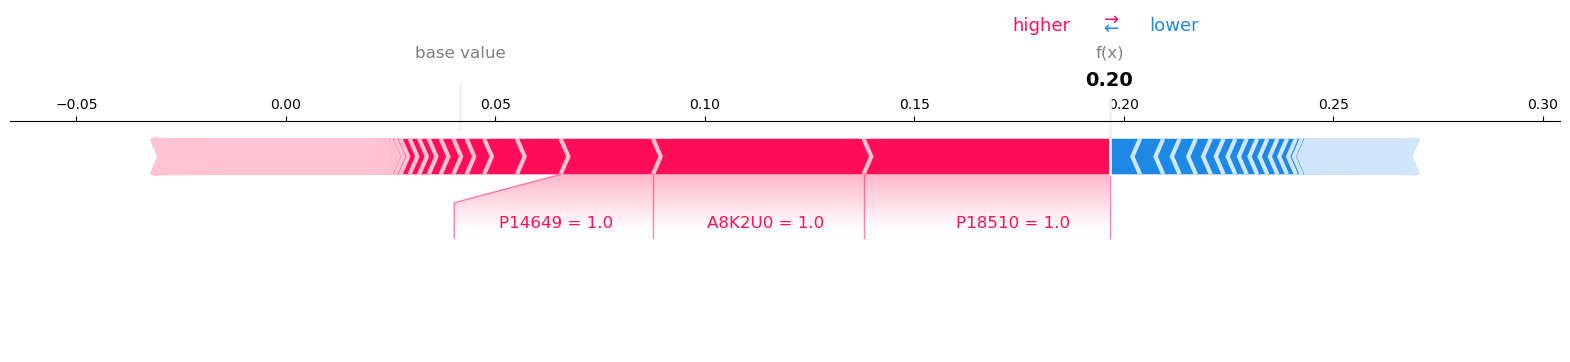

None

Prostate


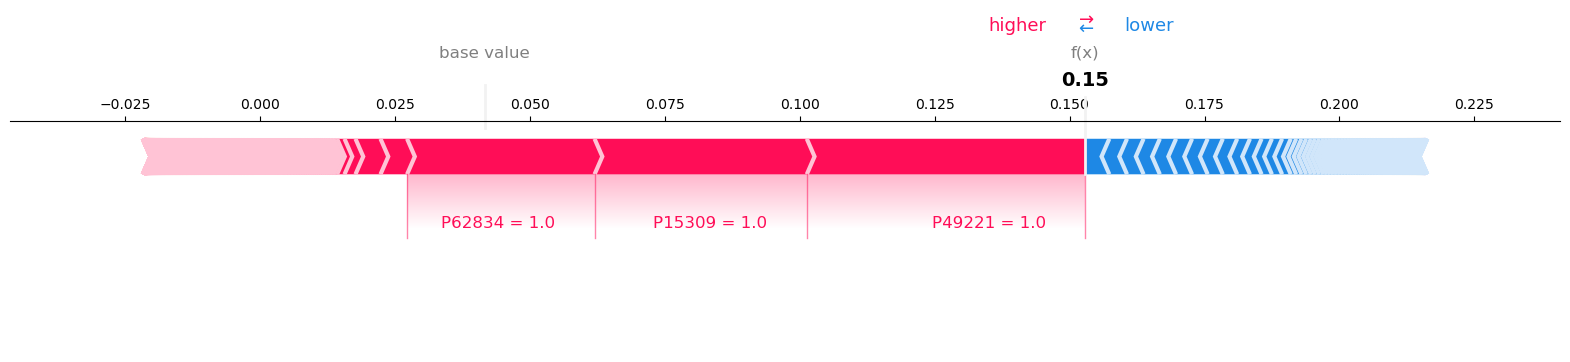

None

Testis


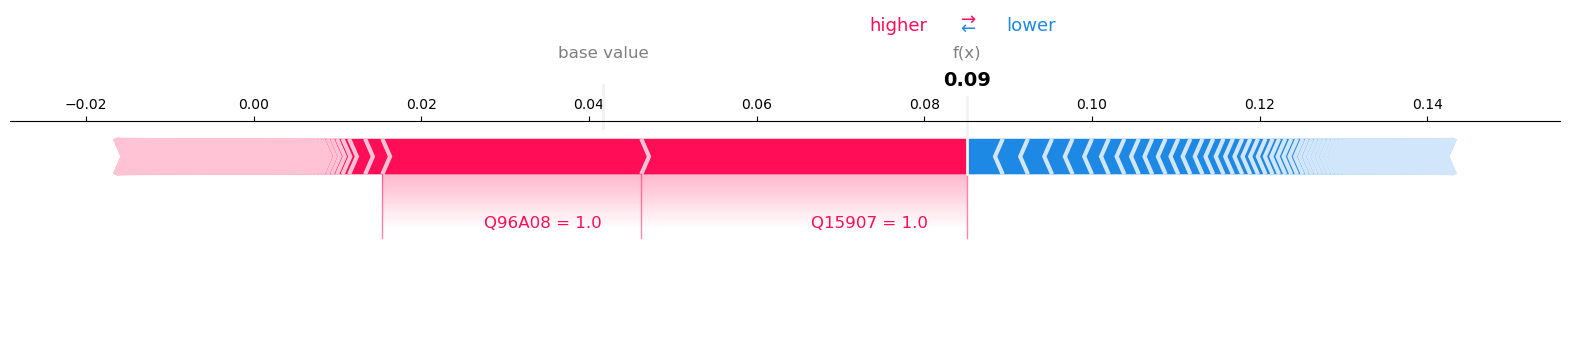

None

Ureter


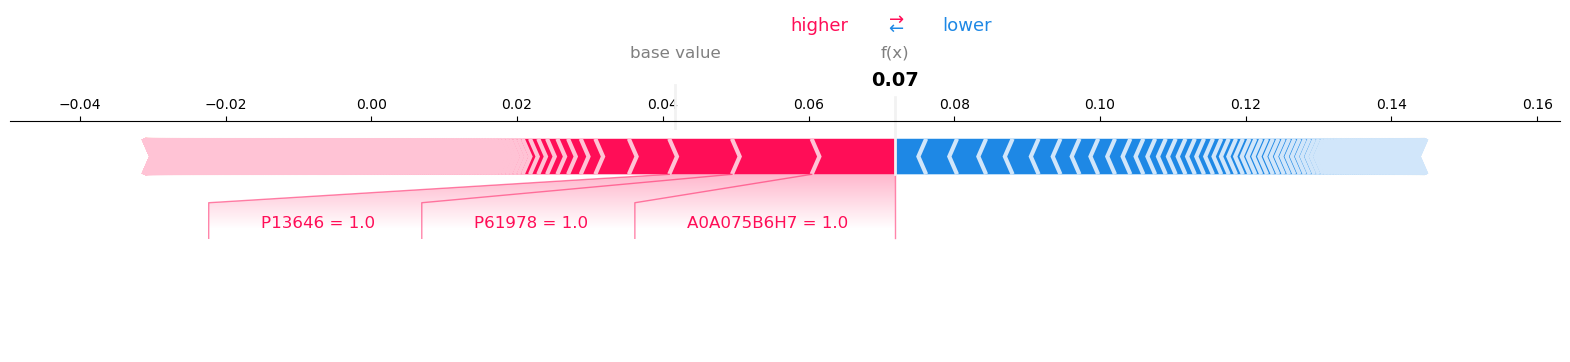

None

Tonsil


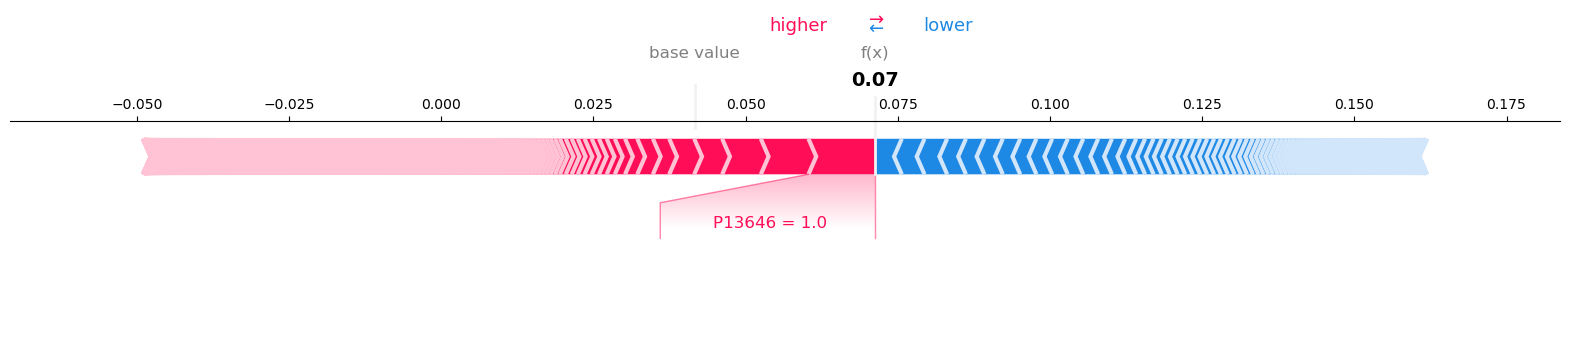

None

S:\Proteomics\CMB\CMB-1515\T063423_AurEl7_PM7_CMB-1515_6_GD3_1_10078.d
tissue
Esophagus    0.142887
Prostate     0.111460
Testis       0.048957
Ureter       0.017598
Tonsil       0.007083
dtype: float64


The base value is 0.04166666666666658
Esophagus


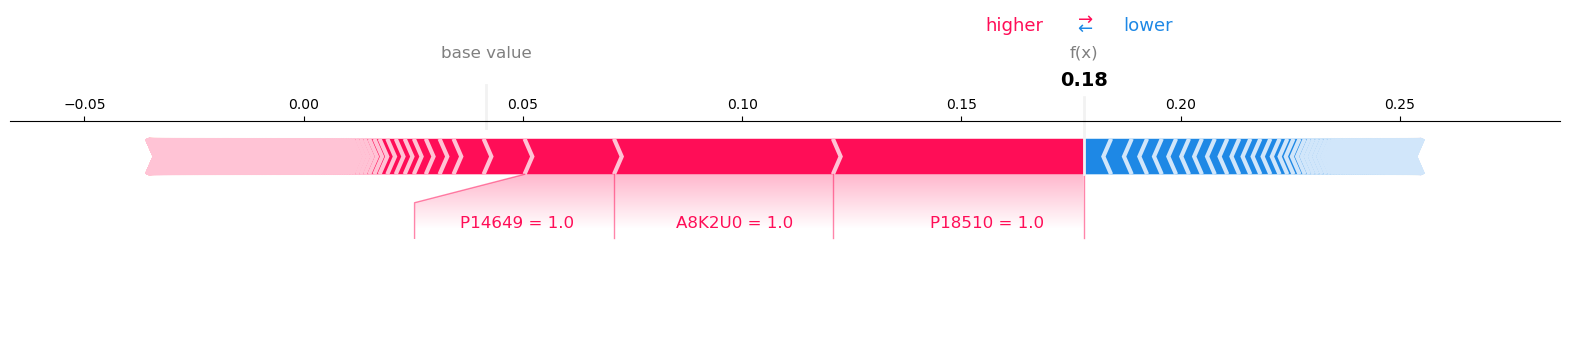

None

Prostate


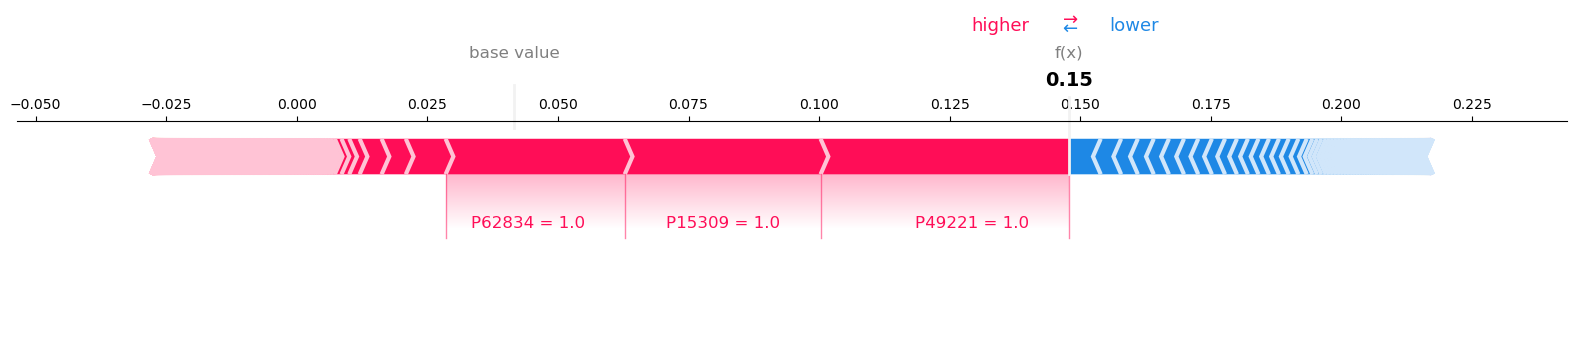

None

Testis


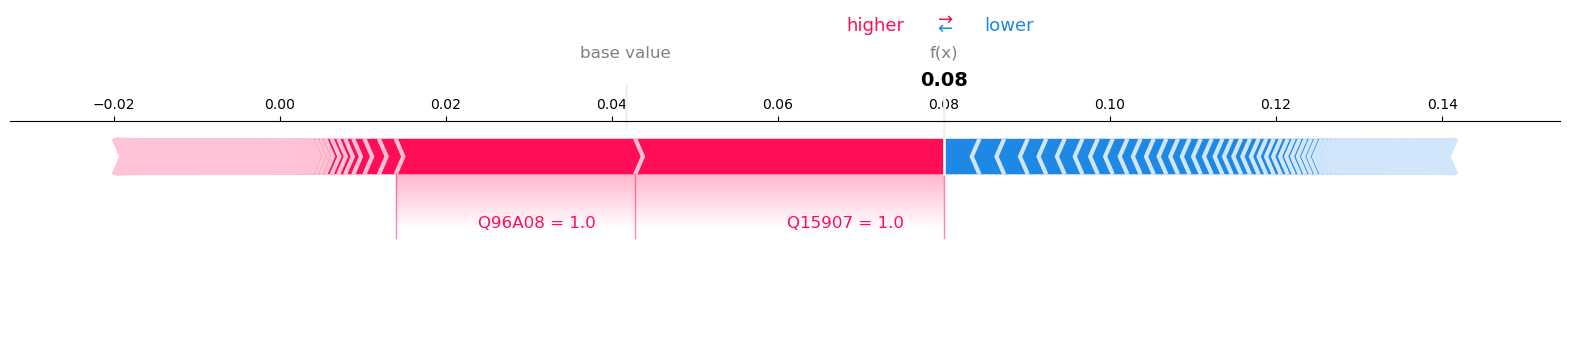

None

Parotid gland


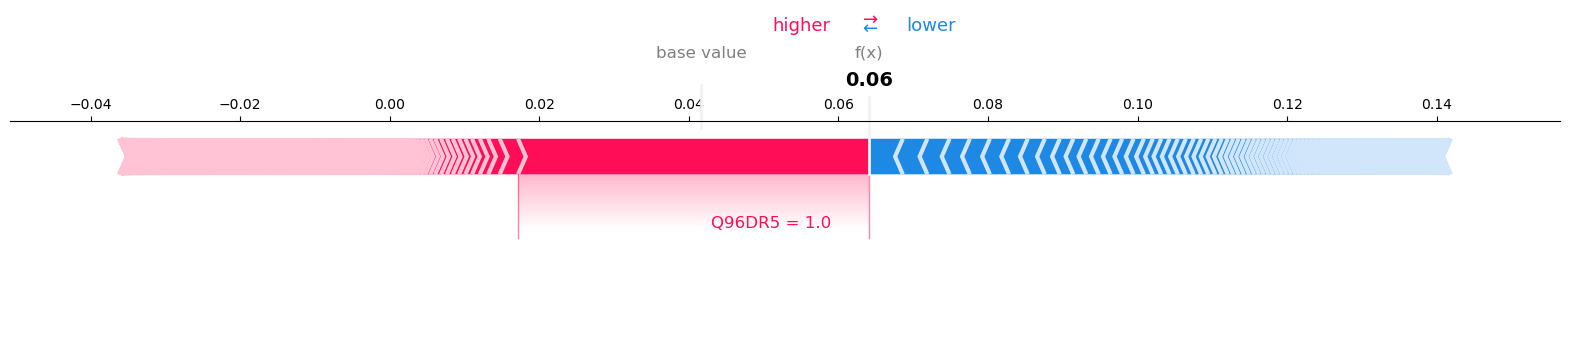

None

Adipose tissue


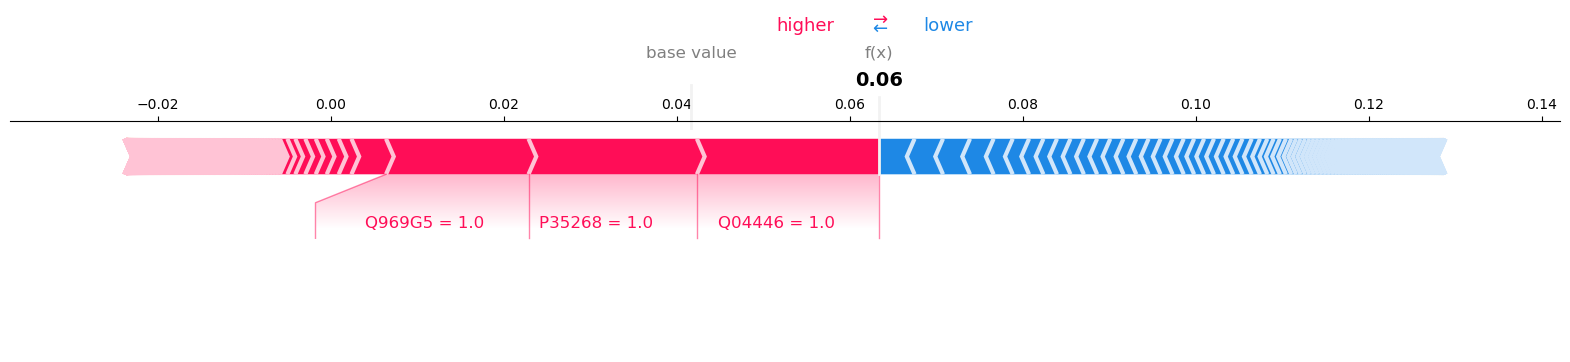

None

S:\Proteomics\CMB\CMB-1515\T063425_AurEl7_PM7_CMB-1515_5_GD2_1_10080.d
tissue
Esophagus         0.125846
Prostate          0.105832
Testis            0.042924
Adipose tissue    0.028692
Parotid gland     0.013638
dtype: float64


The base value is 0.04166666666666658
Prostate


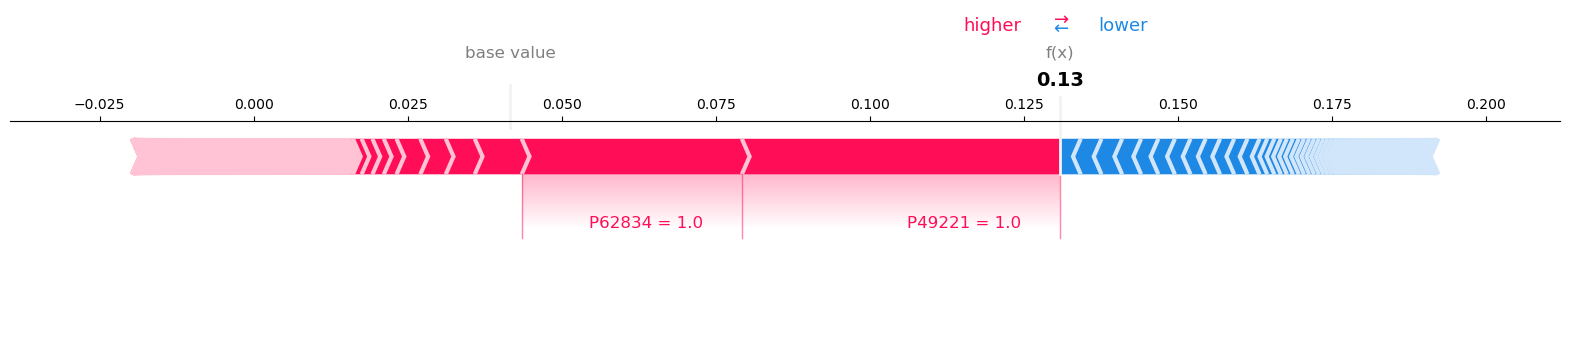

None

Esophagus


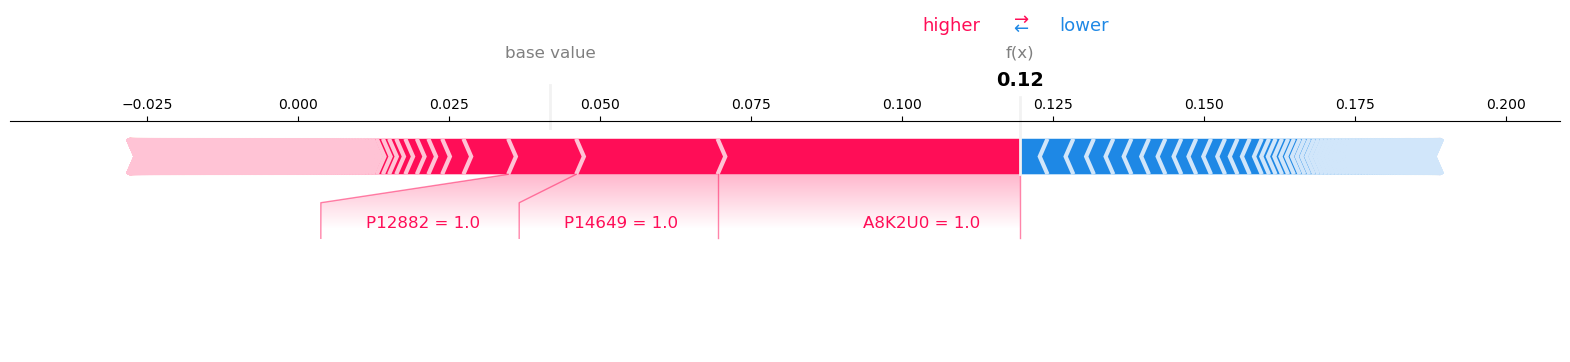

None

Testis


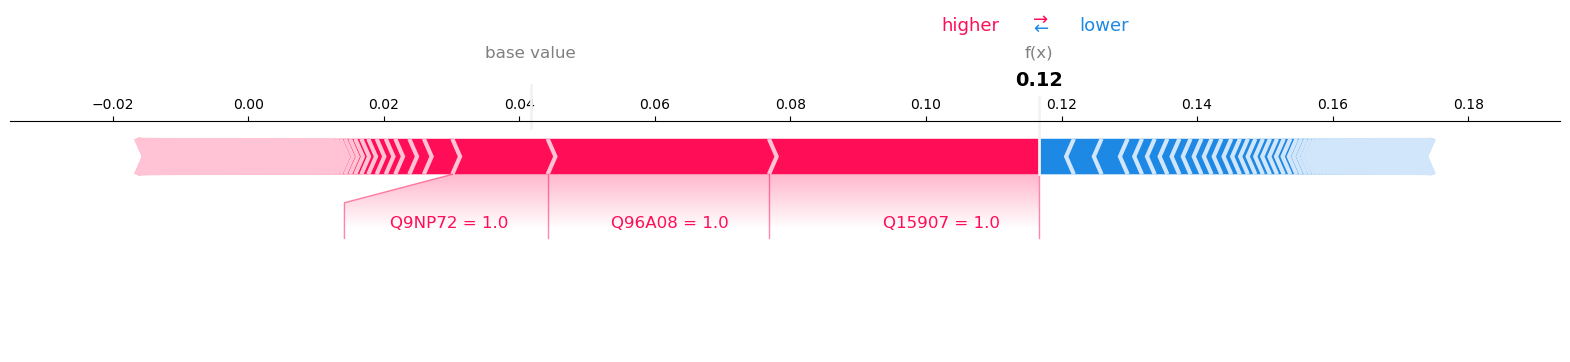

None

Ureter


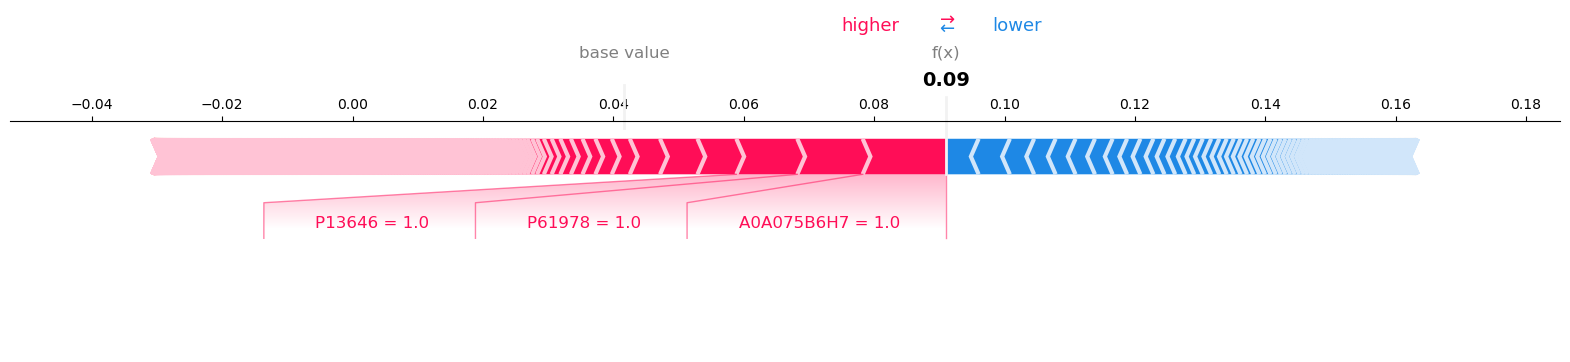

None

Skeletal muscle


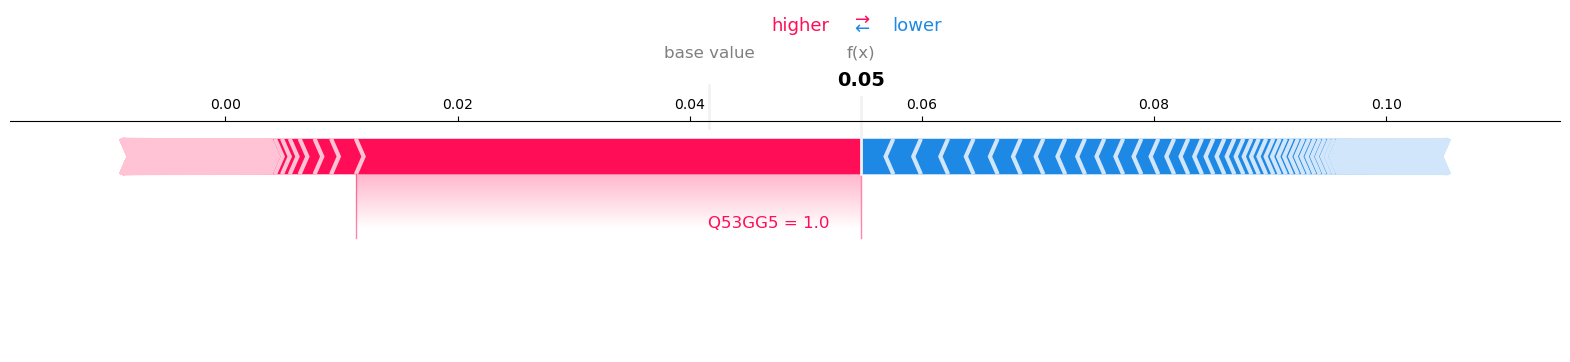

None

S:\Proteomics\CMB\CMB-1515\T063427_AurEl7_PM7_CMB-1515_4_GD1_1_10082.d
tissue
Prostate           0.090413
Testis             0.076954
Esophagus          0.074327
Ureter             0.032307
Skeletal muscle    0.023101
dtype: float64


The base value is 0.04166666666666658
Esophagus


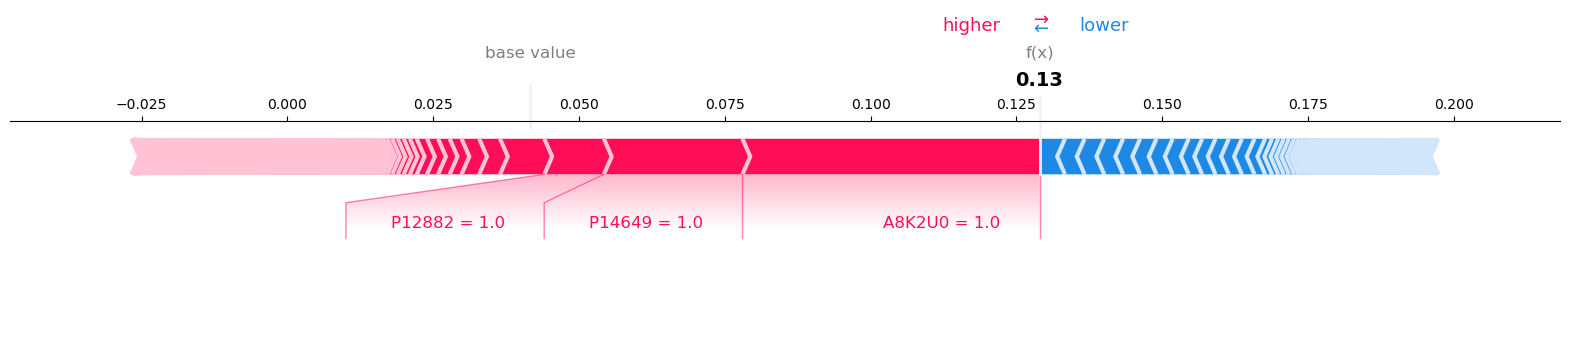

None

Prostate


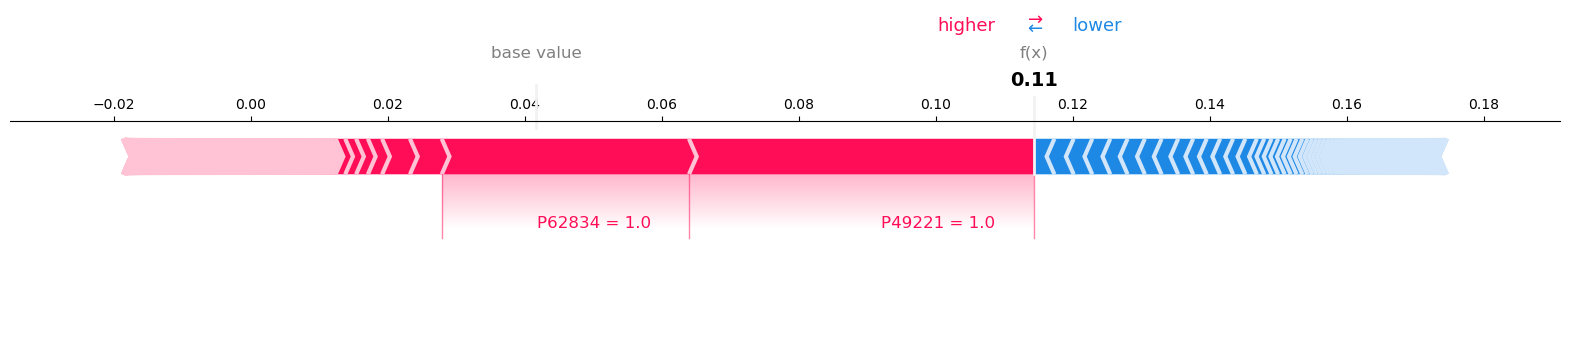

None

Testis


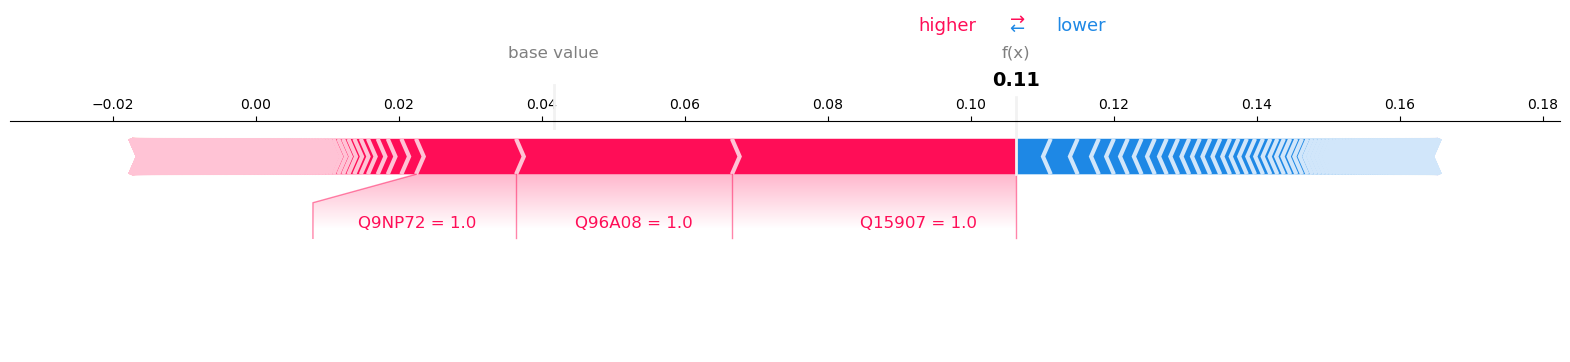

None

Adipose tissue


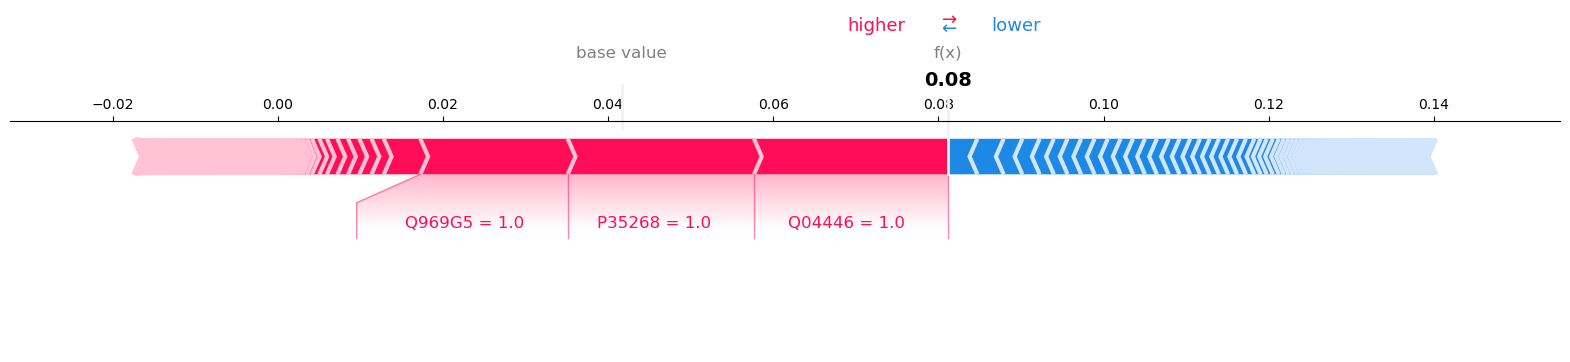

None

Ureter


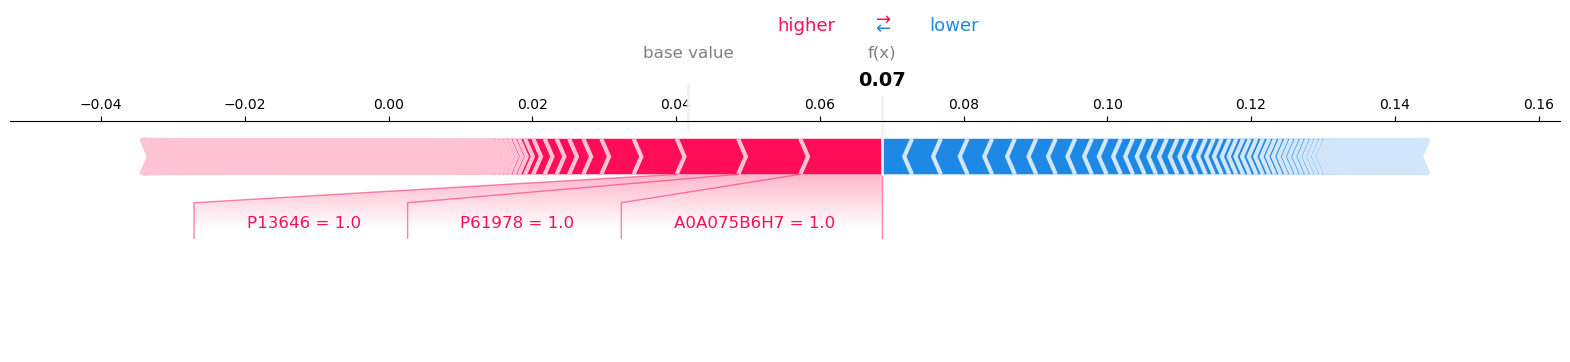

None

S:\Proteomics\CMB\CMB-1515\T063429_AurEl7_PM7_CMB-1515_3_GC8_1_10084.d
tissue
Esophagus         0.081236
Prostate          0.075477
Testis            0.067821
Adipose tissue    0.046005
Ureter            0.014000
dtype: float64


The base value is 0.04166666666666658
Prostate


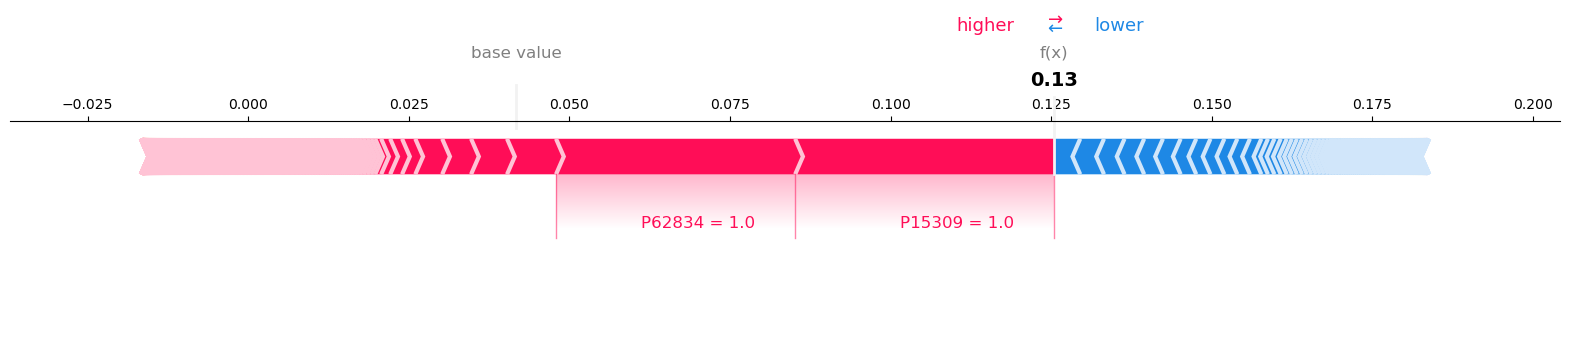

None

Esophagus


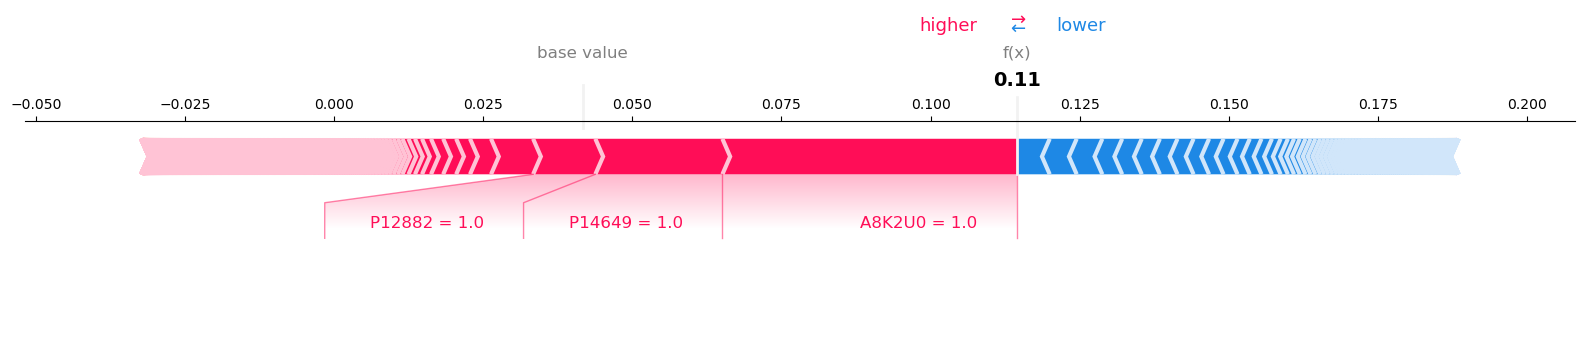

None

Ureter


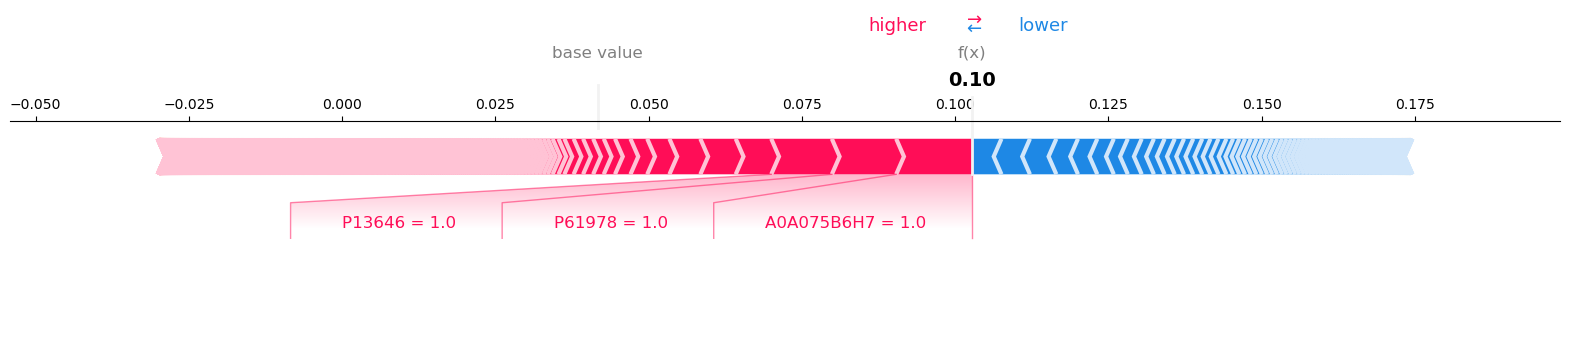

None

Testis


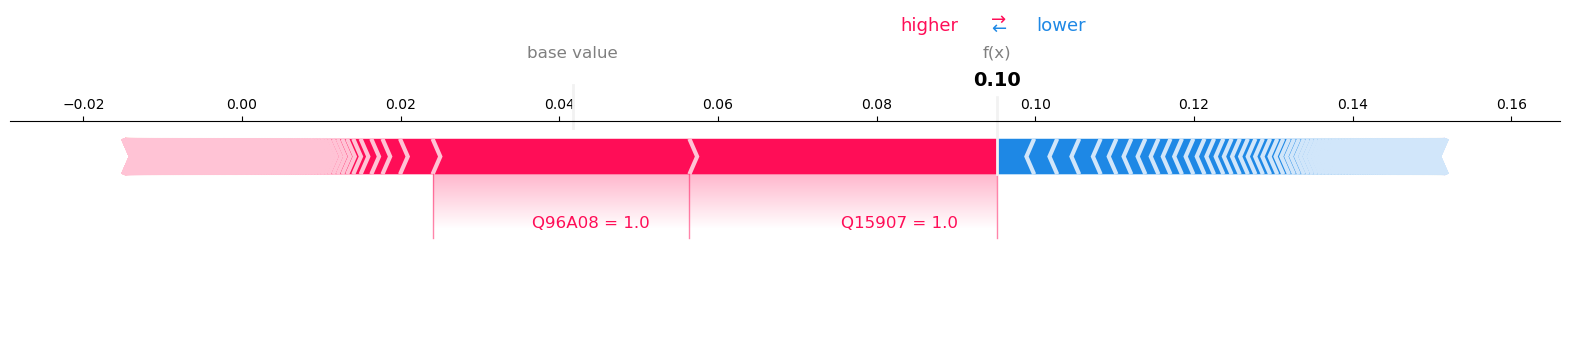

None

Skeletal muscle


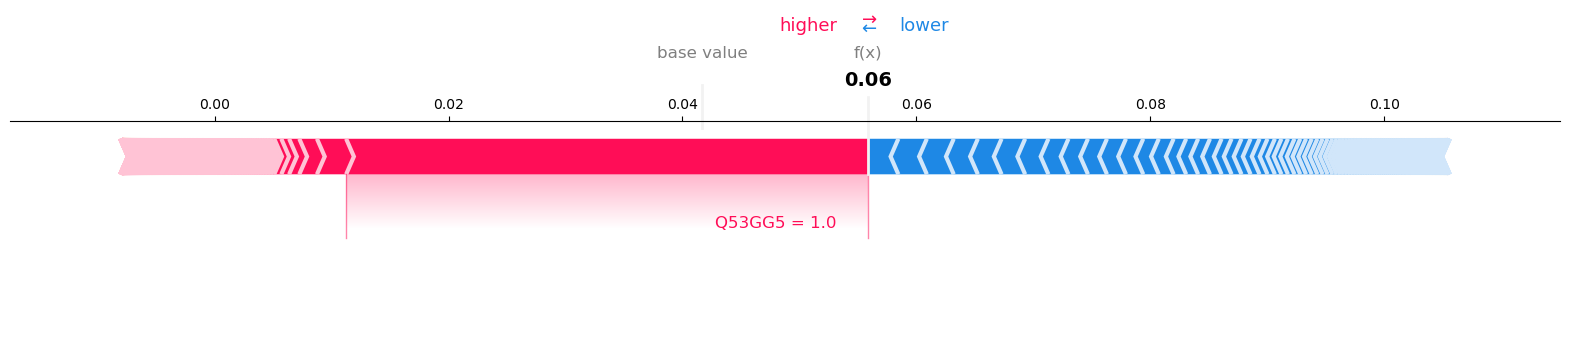

None

S:\Proteomics\CMB\CMB-1515\T063431_AurEl7_PM7_CMB-1515_2_GC7_1_10086.d
tissue
Prostate           0.084061
Esophagus          0.069200
Testis             0.058477
Ureter             0.040872
Skeletal muscle    0.024973
dtype: float64


In [40]:
df = pd.read_csv('./report.pg_matrix.tsv', delimiter='\t')
df.set_index('Protein.Group', inplace=True)
#split df per column from 4 onwards
sample0 = df.iloc[:, 3:4]
sample1 = df.iloc[:, 4:5]
sample2 = df.iloc[:, 5:6]
sample3 = df.iloc[:, 6:7]
sample4 = df.iloc[:, 7:8]
sample5 = df.iloc[:, 8:9]

result_dict = {}
for sample in [sample0, sample1, sample2, sample3, sample4, sample5]:
    sample_name = sample.columns[0]
    sample = sample.dropna()
    sample = sample.reset_index()    
    proteins = np.array(sample[["Protein.Group"]].values.tolist()).flatten()
    # if it contains ';' split it and take both
    proteins = [x.split(';') for x in proteins]
    proteins = [item for sublist in proteins for item in sublist]
    proteins = list(set(proteins))

    #make a dataframe with the proteins as column names, only one row and all values 1
    data = np.ones((1, len(proteins)))
    predict_df = pd.DataFrame(data, columns=proteins)

    test = MLMarker(predict_df.iloc[0:1,:], binary = True)
    MLMarker.visualize_shap_force_plot(test,n_preds=5)
    prediction = MLMarker.adjusted_shap_values_df(test, penalty_factor=0.5)
    prediction = prediction.sum(axis=1).sort_values(ascending=False).head(5)
    print(sample_name)
    print(prediction)
    result_dict[sample_name] = prediction

In [37]:

# Initialize an empty list to store rows
rows = []

# Iterate through each key-value pair in the dictionary
for sample, tissues in result_dict.items():
    for tissue, value in tissues.items():
        rows.append({'Sample': sample, 'tissue': tissue, 'value': value})

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

# Pivot the DataFrame to get the desired format
df_pivot = df.pivot(index='Sample', columns='tissue', values='value').reset_index()
df_pivot

tissue,Sample,Adipose tissue,Esophagus,Parotid gland,Prostate,Skeletal muscle,Testis,Tonsil,Ureter
0,S:\Proteomics\CMB\CMB-1515\T063417_AurEl7_PM7_...,0.039942,0.077478,NaN,0.078669,NaN,0.057483,NaN,0.025773
1,S:\Proteomics\CMB\CMB-1515\T063423_AurEl7_PM7_...,NaN,0.142887,NaN,0.111460,NaN,0.048957,0.007083,0.017598
2,S:\Proteomics\CMB\CMB-1515\T063425_AurEl7_PM7_...,0.028692,0.125846,0.013638,0.105832,NaN,0.042924,NaN,NaN
3,S:\Proteomics\CMB\CMB-1515\T063427_AurEl7_PM7_...,NaN,0.074327,NaN,0.090413,0.023101,0.076954,NaN,0.032307
4,S:\Proteomics\CMB\CMB-1515\T063429_AurEl7_PM7_...,0.046005,0.081236,NaN,0.075477,NaN,0.067821,NaN,0.014000
5,S:\Proteomics\CMB\CMB-1515\T063431_AurEl7_PM7_...,NaN,0.069200,NaN,0.084061,0.024973,0.058477,NaN,0.040872


In [39]:
final_result = pd.merge(df_pivot, metadata, on='Sample')
final_result.sort_values(by='Type', inplace=True)
final_result

,Sample,Adipose tissue,Esophagus,Parotid gland,Prostate,Skeletal muscle,Testis,Tonsil,Ureter,Type
0,S:\Proteomics\CMB\CMB-1515\T063417_AurEl7_PM7_...,0.039942,0.077478,NaN,0.078669,NaN,0.057483,NaN,0.025773,VSMC
3,S:\Proteomics\CMB\CMB-1515\T063427_AurEl7_PM7_...,NaN,0.074327,NaN,0.090413,0.023101,0.076954,NaN,0.032307,VSMC
5,S:\Proteomics\CMB\CMB-1515\T063431_AurEl7_PM7_...,NaN,0.069200,NaN,0.084061,0.024973,0.058477,NaN,0.040872,VSMC
1,S:\Proteomics\CMB\CMB-1515\T063423_AurEl7_PM7_...,NaN,0.142887,NaN,0.111460,NaN,0.048957,0.007083,0.017598,occlusie
2,S:\Proteomics\CMB\CMB-1515\T063425_AurEl7_PM7_...,0.028692,0.125846,0.013638,0.105832,NaN,0.042924,NaN,NaN,occlusie
4,S:\Proteomics\CMB\CMB-1515\T063429_AurEl7_PM7_...,0.046005,0.081236,NaN,0.075477,NaN,0.067821,NaN,0.014000,occlusie


In [41]:
final_result.to_csv('final_result.csv', index=False)

Get the contributing proteins

In [86]:
df = pd.read_csv('./report.pg_matrix.tsv', delimiter='\t')
df.set_index('Protein.Group', inplace=True)
#split df per column from 4 onwards
sample0 = df.iloc[:, 3:4]
sample1 = df.iloc[:, 4:5]
sample2 = df.iloc[:, 5:6]
sample3 = df.iloc[:, 6:7]
sample4 = df.iloc[:, 7:8]
sample5 = df.iloc[:, 8:9]

result_shap_df = pd.DataFrame()
for sample in [sample0, sample1, sample2, sample3, sample4, sample5]:
    sample_name = sample.columns[0]
    sample = sample.dropna()
    sample = sample.reset_index()    
    proteins = np.array(sample[["Protein.Group"]].values.tolist()).flatten()
    # if it contains ';' split it and take both
    proteins = [x.split(';') for x in proteins]
    proteins = [item for sublist in proteins for item in sublist]
    proteins = list(set(proteins))

    #make a dataframe with the proteins as column names, only one row and all values 1
    data = np.ones((1, len(proteins)))
    predict_df = pd.DataFrame(data, columns=proteins)
    test = MLMarker(predict_df.iloc[0:1,:], binary = True)
    shap_df = MLMarker.adjusted_shap_values_df(test, n_preds=5, penalty_factor=0.5).reset_index()
    #drop rows with nan
    shap_df = shap_df.dropna()
    shap_df['Sample'] = sample_name
    shap_df.set_index(['Sample', 'tissue'], inplace=True)
    shap_df = shap_df.apply(lambda x: x.nlargest(15), axis=1)    
    result_shap_df = pd.concat([result_shap_df, shap_df])

result_shap_df.reset_index(inplace=True)

In [88]:
final_proteins = pd.merge(result_shap_df, metadata, on='Sample')
final_proteins['Sample'] = final_proteins['Sample'].str.split('\\').str[-1]
final_proteins.sort_values(by=['Type', 'Sample'], inplace=True)
final_proteins.set_index(['Sample', 'Type', 'tissue'], inplace=True)
final_proteins

A0A075B6H7  \
Sample                                      Type     tissue                        
T063417_AurEl7_PM7_CMB-1515_9_GD6_1_10072.d VSMC     Esophagus          0.001023   
                                                     Prostate                NaN   
                                                     Testis                  NaN   
                                                     Ureter             0.013729   
                                                     Adipose tissue          NaN   
T063427_AurEl7_PM7_CMB-1515_4_GD1_1_10082.d VSMC     Prostate                NaN   
                                                     Esophagus          0.001022   
                                                     Testis                  NaN   
                                                     Ureter             0.012752   
                                                     Skeletal muscle         NaN   
T063431_AurEl7_PM7_CMB-1515_2_GC7_1_10086.d VSMC     Prostate                NaN   
                                                     Esophagus          0.001021   
                                                     Ureter             0.012435   
                                                     Testis                  NaN   
                                                     Skeletal muscle         NaN   
T063423_AurEl7_PM7_CMB-1515_6_GD3_1_10078.d occlusie Esophagus          0.001022   
                                                     Prostate                NaN   
                                                     Testis                  NaN   
                                                     Ureter             0.011454   
                                                     Tonsil                  NaN   
T063425_AurEl7_PM7_CMB-1515_5_GD2_1_10080.d occlusie Esophagus          0.001023   
                                                     Prostate                NaN   
                                                     Testis                  NaN   
                                                     Parotid gland           NaN   
                                                     Adipose tissue          NaN   
T063429_AurEl7_PM7_CMB-1515_3_GC8_1_10084.d occlusie Esophagus          0.001023   
                                                     Prostate                NaN   
                                                     Testis                  NaN   
                                                     Adipose tissue          NaN   
                                                     Ureter             0.011365   

                                                                        A8K2U0  \
Sample                                      Type     tissue                      
T063417_AurEl7_PM7_CMB-1515_9_GD6_1_10072.d VSMC     Esophagus        0.050079   
                                                     Prostate              NaN   
                                                     Testis                NaN   
                                                     Ureter                NaN   
                                                     Adipose tissue        NaN   
T063427_AurEl7_PM7_CMB-1515_4_GD1_1_10082.d VSMC     Prostate              NaN   
                                                     Esophagus        0.050079   
                                                     Testis                NaN   
                                                     Ureter                NaN   
                                                     Skeletal muscle       NaN   
T063431_AurEl7_PM7_CMB-1515_2_GC7_1_10086.d VSMC     Prostate              NaN   
                                                     Esophagus        0.049397   
                                                     Ureter                NaN   
                                                     Testis                NaN   
                                                     Skeletal muscle 

In [95]:
final_proteins.to_csv('final_proteins.csv')

<Figure size 2000x2000 with 0 Axes>

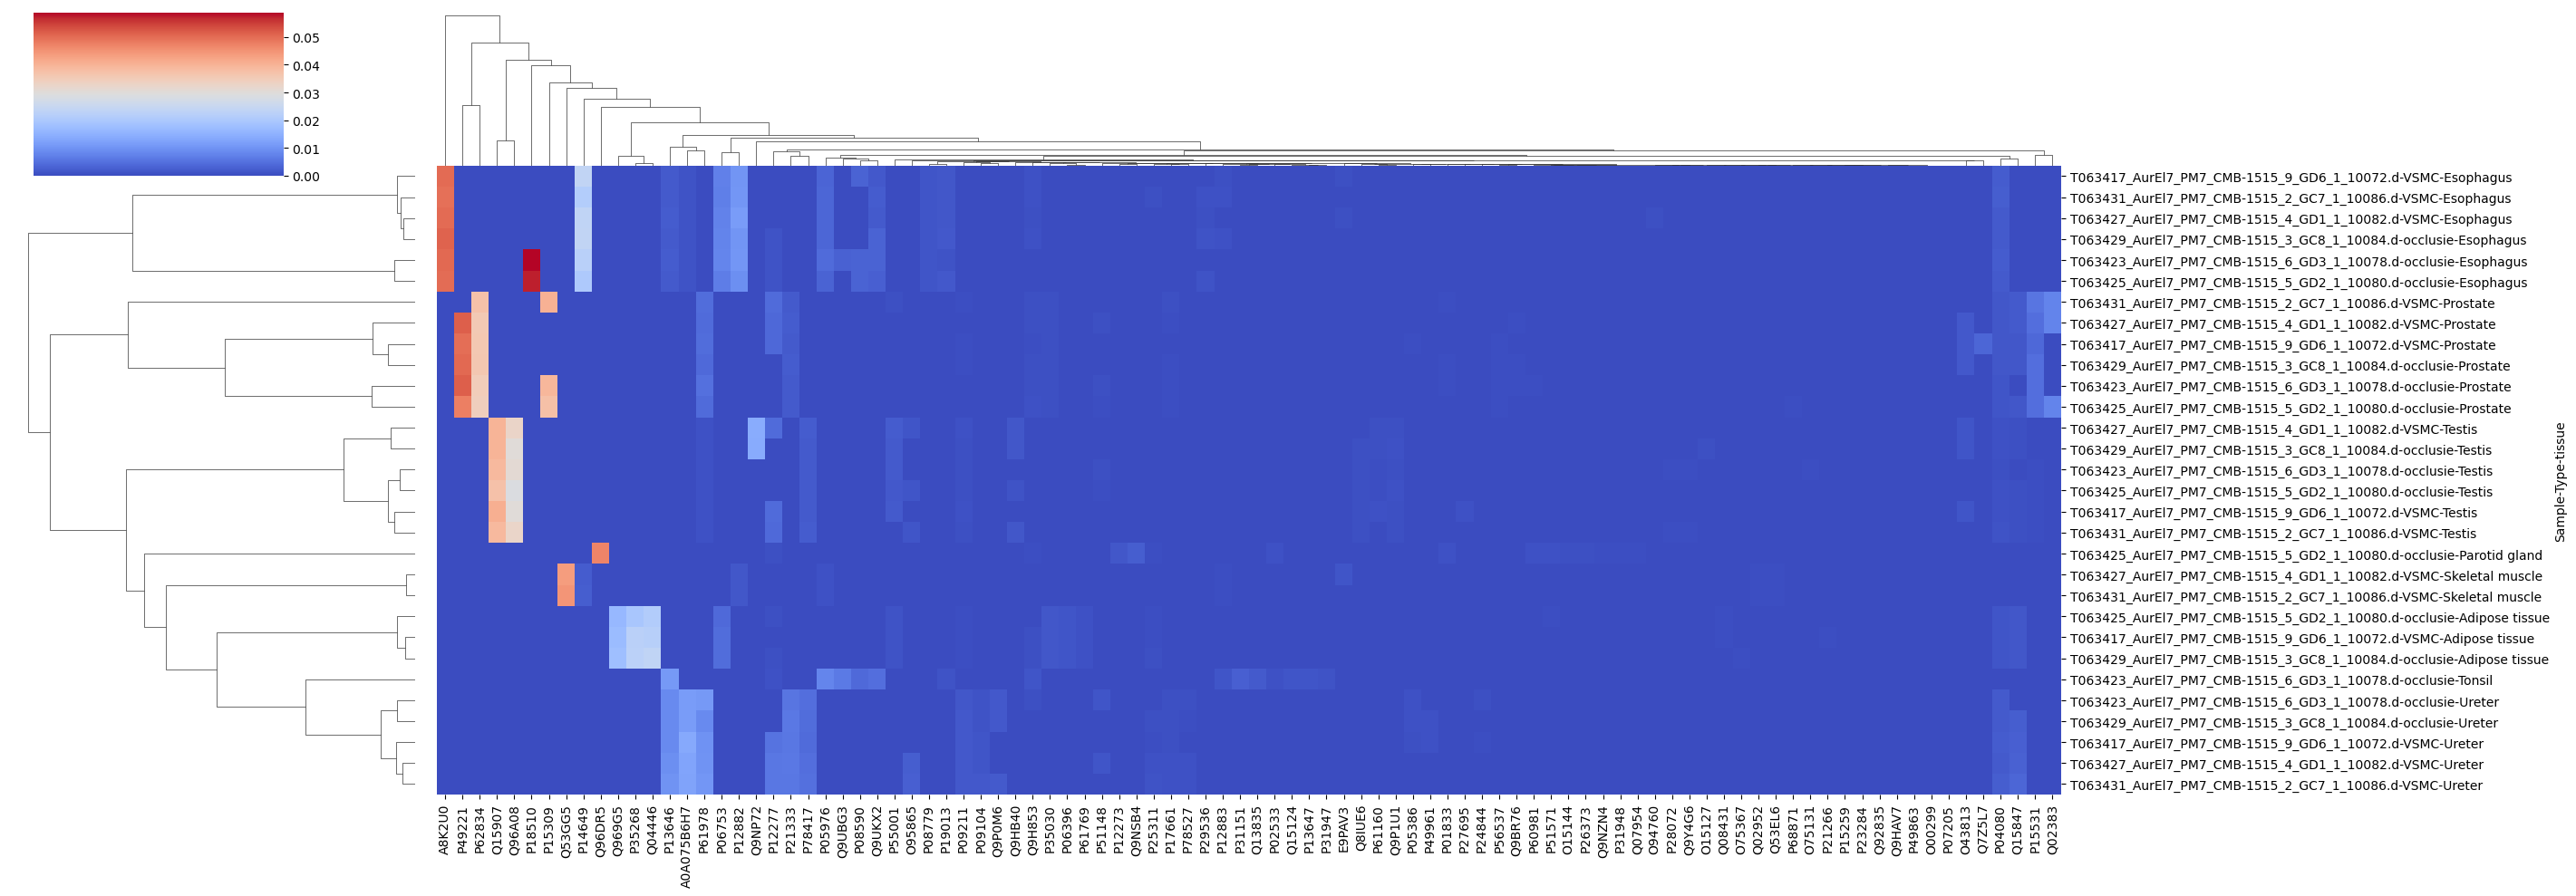

In [94]:
#clustermap of final_proteins
import seaborn as sns
plt.figure(figsize=(20, 20))
clustermap = sns.clustermap(final_proteins.fillna(0), cmap='coolwarm', xticklabels=True)

# Set the figure size
clustermap.fig.set_size_inches(55, 10)